<a href="https://colab.research.google.com/github/ashdtsc/AI-ML-Learning-/blob/main/Deep_Learning_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Classifying movie reviews***

In [ ]:
# Load IMDB data
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

In [ ]:
# Define a NN for taking multiple inputs (Title, Text Body, Tags) and multiple outputs (Priority (0-1) and department)
# Assuming some input values
vocab_size = 10000 # this is to encode text body and title
num_tags = 100 # number of categories
num_departments = 6 # number of departments

# Create Input layers
title = keras.Input((vocab_size,), name = 'title')
tags = keras.Input((num_tags,), name = 'tags')
text_body = keras.Input((vocab_size,), name = 'body')

# Create feature layers
features = layers.Concatenate()([title, tags, text_body])
features = layers.Dense(64, 'relu') (features)

# Creat output layers
priority = layers.Dense(1, 'sigmoid', name = 'priority') (features)
department = layers.Dense(num_departments, 'softmax', name = 'department') (features)

model = keras.Model(inputs = [title, tags, text_body],
                    outputs = [priority, department])



In [ ]:
# Compiling Functional model
sample_size = 1280

# initialising Dummy input data

title_data = np.random.randint(0, 2 , (sample_size, vocab_size))
body_data = np.random.randint(0,2, (sample_size, vocab_size))
tag_data = np.random.randint(0, 2, (sample_size, num_tags))

# Similarly dummy target data

priority_data = np.random.random((sample_size, 1))
department_data = np.random.randint(0,2, (sample_size, num_departments))

model.compile(
    loss = ['mean_squared_error','categorical_crossentropy'], # Sequence of data matters here, which loss is for which NN
    optimizer = 'rmsprop',
    metrics = [['mean_absolute_error'],['accuracy']]
)


In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png")

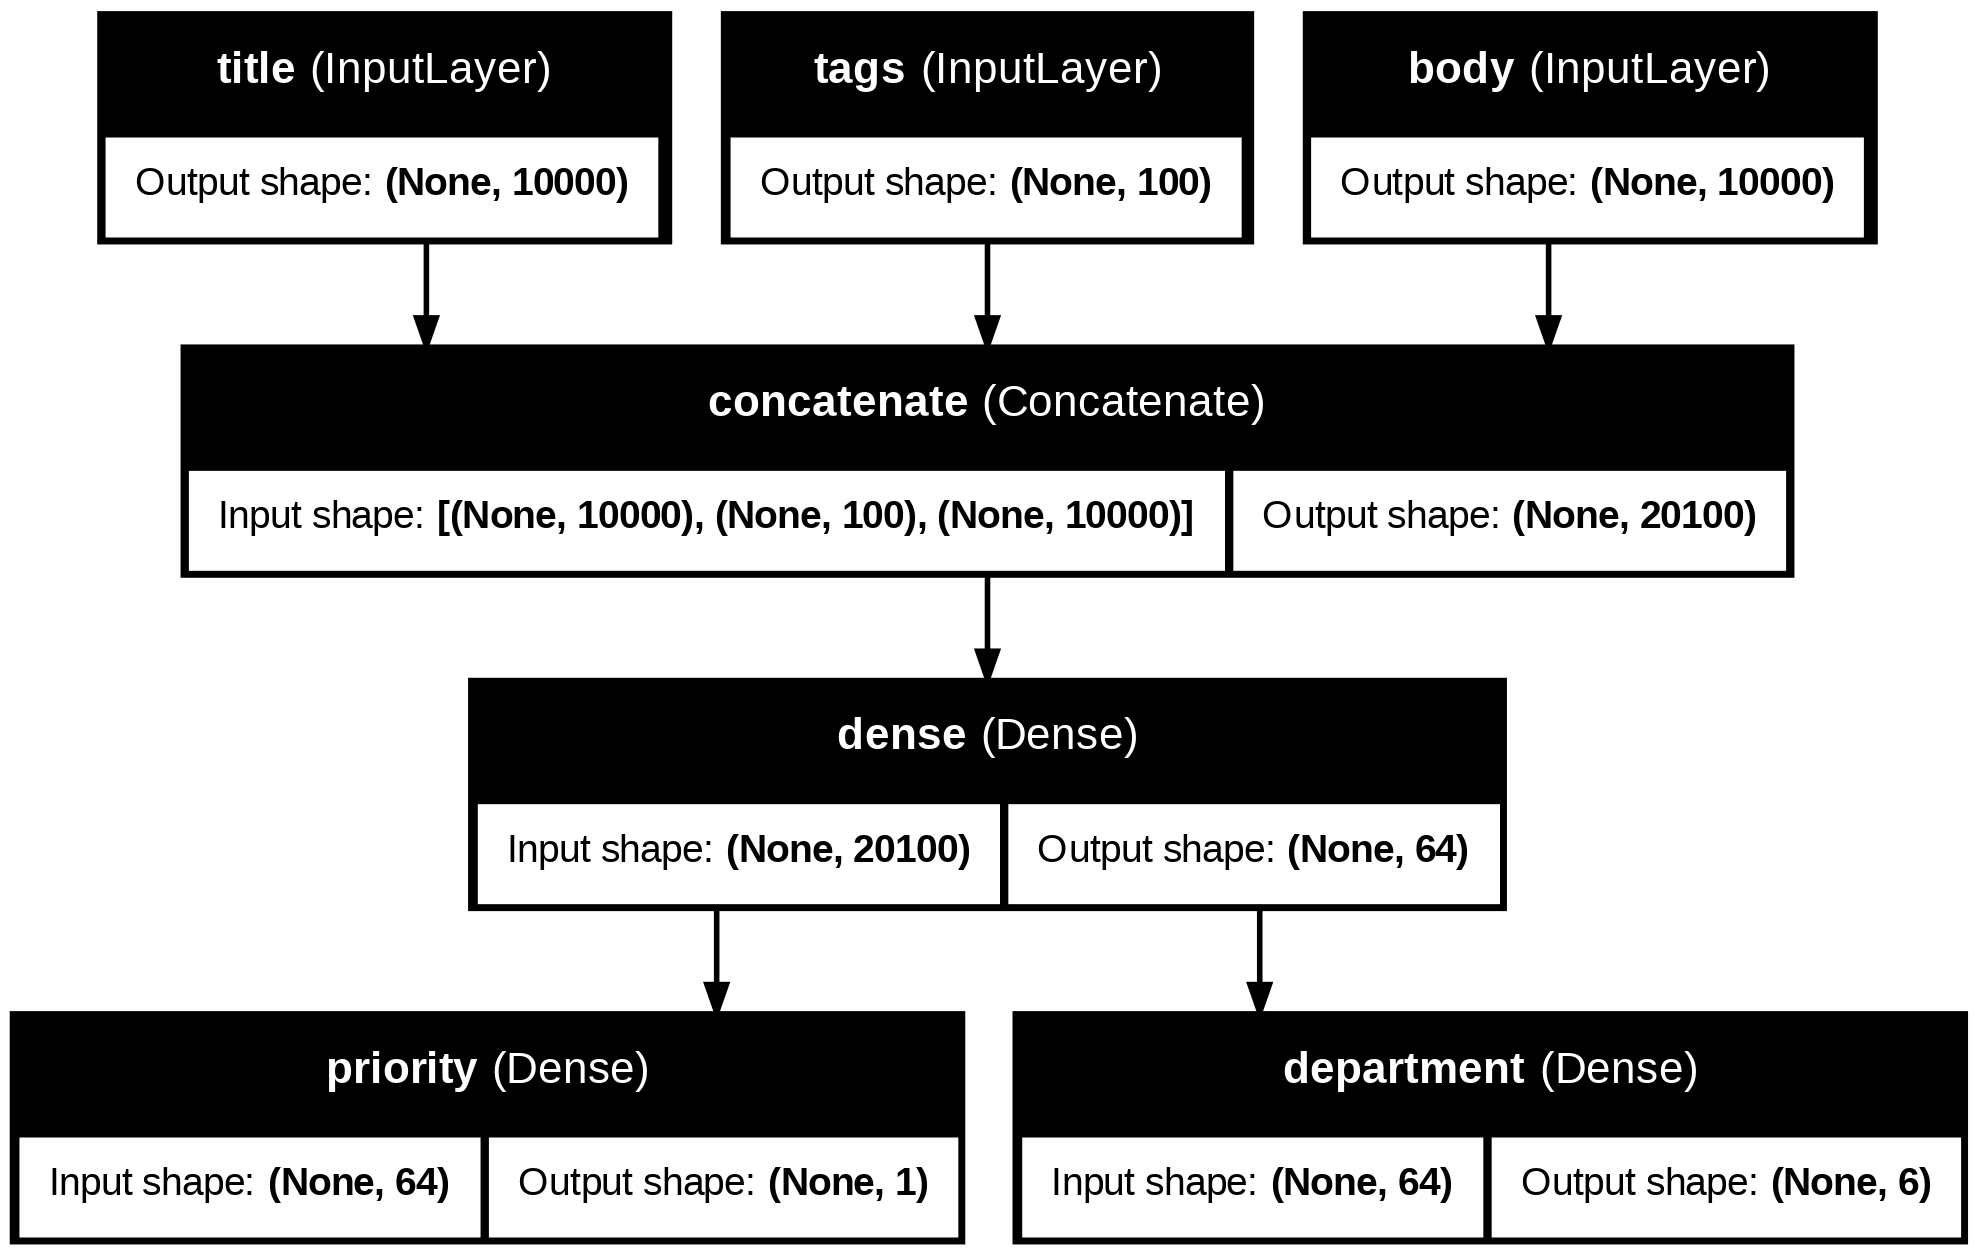

In [ ]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True, show_layer_names=True)


In [ ]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=tags, built=True>,
 <InputLayer name=body, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=body>